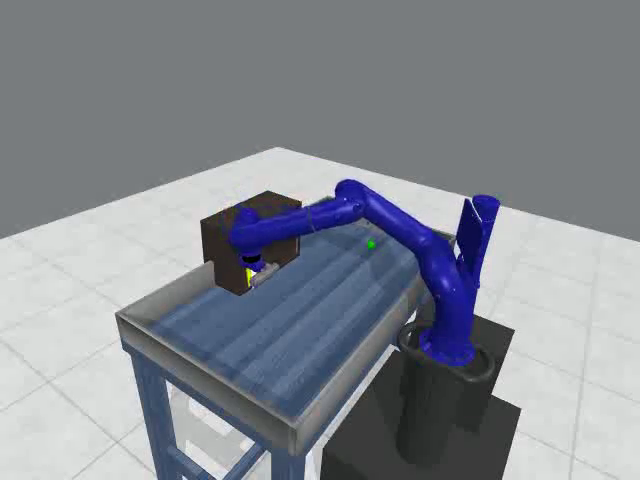

In [18]:
from IPython.display import clear_output, display, HTML
from PIL import Image
import time
import cv2
import base64
import os
import csv

current_time = 0

# 图像处理函数
def processImg(img):
    # 画出一个框
    cv2.rectangle(img, (500, 300), (800, 400), (0, 0, 255), 5, 1, 0)
    # 上下翻转
    # img= cv2.flip(img, 0)

    # 显示FPS
    global current_time
    if current_time == 0:
        current_time = time.time()
    else:
        last_time = current_time
        current_time = time.time()
        fps = 1. / (current_time - last_time)
        text = "FPS: %d" % int(fps)
        cv2.putText(img, text , (0,100), cv2.FONT_HERSHEY_TRIPLEX, 3.65, (255, 0, 0), 2)
    
    return img

def arrayShow(imageArray):
    ret, png = cv2.imencode('.png', imageArray)
    encoded = base64.b64encode(png)
    return Image(data=encoded.decode('ascii'))


print("begin-------------------------------3")
video_path = "p2dataset"
v_names = os.listdir(video_path)
i = 0
with open("p2anotation.csv", "a") as f:
    csv_writer = csv.writer(f)
    while i < len(v_names):
        v_path = os.path.join(video_path, v_names[i])
        print(f"show the video {v_path}")
        video = cv2.VideoCapture(v_path)
        while True:
            clear_output(wait=True)
            ret, frame = video.read()
            if not ret:
                break
            lines, columns, _ = frame.shape
            # print(frame.shape)
            # frame = cv2.resize(frame, (320, 240))
            img = Image.fromarray(frame)
            display(img)
            time.sleep(1/24)
        video.release()
        # 2 open the door， 3 the door is opened， 4 others of door
        lab = input("请输入下一步动作, 1代表再次播放, 2-4代表标注, 标注后next")
        if int(lab) != 1:
            i += 1
            if int(lab) == 2:
                csv_writer.writerow([v_path, "open the door"])
            elif int(lab) == 3:
                csv_writer.writerow([v_path, "the door is opened"])
            elif int(lab) == 4:
                csv_writer.writerow([v_path, "others of the door"])
            else:
                csv_writer.writerow([v_path, "useless data"])
    f.close()
            

# img = cv2.imread("example.png")
# img = Image.fromarray(img)

# # img = Image("example.png")
# print(type(img))
# display(img)
# while(True):
#     try:
#         clear_output(wait=True)
#         ret, frame = video.read()
#         if not ret:
#             break
#         lines, columns, _ = frame.shape
#         frame = processImg(frame)
#         frame = cv2.resize(frame, (int(columns / 4), int(lines / 4)))

#         img = arrayShow(frame)
#         display(img)
#         # 控制帧率
#         time.sleep(1/24)
#     except KeyboardInterrupt:
#         video.release()


